In [31]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

(-0.5, 1999.5, 1170.5, -0.5)

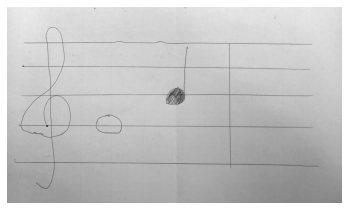

In [32]:
# Change as you wish (handwritten/notes1/notes2)
image_src = "img/notes2.jpg"

img = cv2.imread(image_src)
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

plt.imshow(gray, cmap=plt.cm.gray)
plt.axis('off')

True

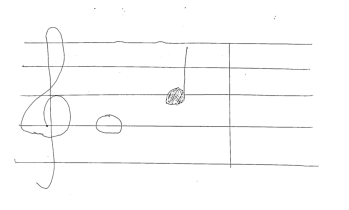

In [33]:
thresh = cv2.adaptiveThreshold(gray, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 21, 10)

plt.imshow(thresh, cmap=plt.cm.gray)
plt.axis('off')
cv2.imwrite("out/thresh.jpg", thresh)

True

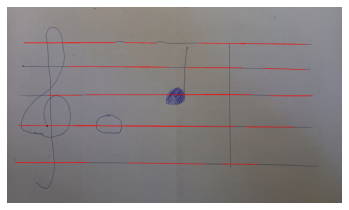

In [34]:
lines = cv2.HoughLinesP(cv2.bitwise_not(thresh), 2, np.pi/180, 10, minLineLength=150, maxLineGap=10)
for line in lines:
    x1, y1, x2, y2 = (line[0][0], line[0][1], line[0][2], line[0][3])
    # if line is nearly horizontal
    if(abs(y2 - y1) < 10):
        cv2.line(img,(x1,y1),(x2,y2),(0,0,255),thickness=2)

# Note that cv2 uses BGR
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.axis('off')
cv2.imwrite("out/result.jpg", img)